<a href="https://colab.research.google.com/github/AsifRifat/Liver-Cirrhosis-Prediction/blob/main/cirrhosis_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/CSE498R/

/content/drive/My Drive/CSE498R


In [ ]:
df = pd.read_csv('cirrhosis.csv')

df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5000,261.0000,2.6000,156.0000,1718.0000,137.9500,172.0000,190.0000,12.2000,4.0000
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1000,302.0000,4.1400,54.0000,7394.8000,113.5200,88.0000,221.0000,10.6000,3.0000
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4000,176.0000,3.4800,210.0000,516.0000,96.1000,55.0000,151.0000,12.0000,4.0000
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8000,244.0000,2.5400,64.0000,6121.8000,60.6300,92.0000,183.0000,10.3000,4.0000
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4000,279.0000,3.5300,143.0000,671.0000,113.1500,72.0000,136.0000,10.9000,3.0000


In [ ]:
df.shape

(418, 20)

In [ ]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.0000,418.0000,418.0000,418.0000,284.0000,418.0000,310.0000,312.0000,312.0000,282.0000,407.0000,416.0000,412.0000
mean,209.5000,1917.7823,18533.3517,3.2208,369.5106,3.4974,97.6484,1982.6558,122.5563,124.7021,257.0246,10.7317,3.0243
std,120.8105,1104.6730,3815.8451,4.4075,231.9445,0.4250,85.6139,2140.3888,56.6995,65.1486,98.3256,1.0220,0.8820
min,1.0000,41.0000,9598.0000,0.3000,120.0000,1.9600,4.0000,289.0000,26.3500,33.0000,62.0000,9.0000,1.0000
25%,105.2500,1092.7500,15644.5000,0.8000,249.5000,3.2425,41.2500,871.5000,80.6000,84.2500,188.5000,10.0000,2.0000
50%,209.5000,1730.0000,18628.0000,1.4000,309.5000,3.5300,73.0000,1259.0000,114.7000,108.0000,251.0000,10.6000,3.0000
75%,313.7500,2613.5000,21272.5000,3.4000,400.0000,3.7700,123.0000,1980.0000,151.9000,151.0000,318.0000,11.1000,4.0000
max,418.0000,4795.0000,28650.0000,28.0000,1775.0000,4.6400,588.0000,13862.4000,457.2500,598.0000,721.0000,18.0000,4.0000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
df["Age"] = (df["Age"]/365)
df["Age"] = df["Age"].astype("int64")
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5000,261.0000,2.6000,156.0000,1718.0000,137.9500,172.0000,190.0000,12.2000,4.0000
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1000,302.0000,4.1400,54.0000,7394.8000,113.5200,88.0000,221.0000,10.6000,3.0000
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4000,176.0000,3.4800,210.0000,516.0000,96.1000,55.0000,151.0000,12.0000,4.0000
3,4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8000,244.0000,2.5400,64.0000,6121.8000,60.6300,92.0000,183.0000,10.3000,4.0000
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4000,279.0000,3.5300,143.0000,671.0000,113.1500,72.0000,136.0000,10.9000,3.0000


In [ ]:
df.isnull().sum()

ID               0  
N_Days           0  
Status           0  
Drug             106
Age              0  
Sex              0  
Ascites          106
Hepatomegaly     106
Spiders          106
Edema            0  
Bilirubin        0  
Cholesterol      134
Albumin          0  
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets        11 
Prothrombin      2  
Stage            6  
dtype: int64

In [ ]:
categorical_cols = df.select_dtypes(["object"])
numerical_cols = df.select_dtypes(["float64","int64"])

for col in categorical_cols.columns:
    df[col].fillna(df[col].mode().values[0], inplace=True)

for col in numerical_cols.columns:
    df[col].fillna(df[col].median(), inplace=True)
    
df.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

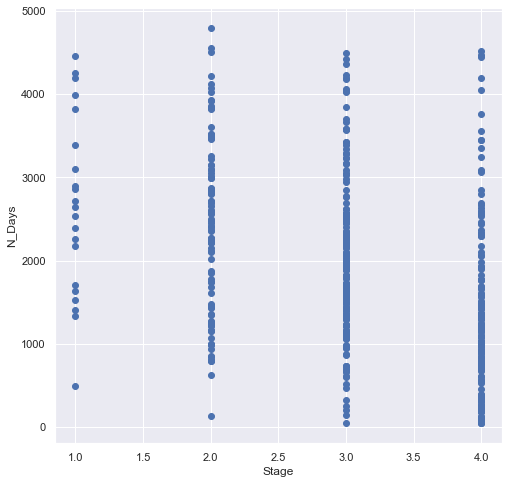

In [ ]:
plt.scatter(df['Stage'], df['N_Days'])
plt.xlabel('Stage')
plt.ylabel('N_Days')
plt.show()

In [ ]:
import plotly.graph_objects as go

# Get data
data_pie = df['Status'].value_counts()

# Plot
fig = go.Figure(data=[go.Pie(labels=data_pie.index, values=data_pie.tolist(), textinfo='label+percent',
                             insidetextorientation='radial'
                            )])

fig.update_traces(hole=.3, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Pie chart for status")

fig.show()

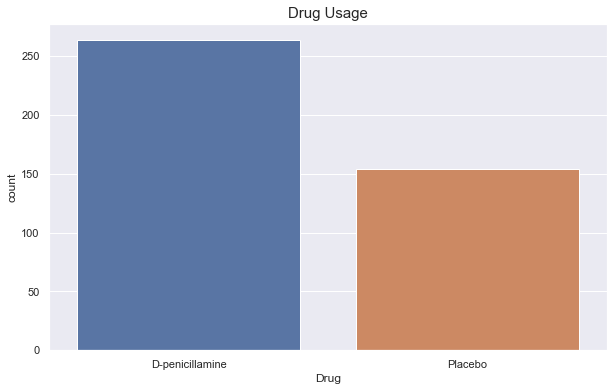

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df["Drug"])
plt.title("Drug Usage", size=15)
plt.show()

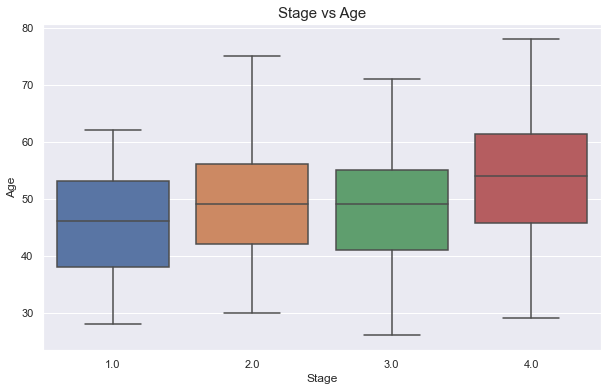

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Stage"], y=df["Age"])
plt.title("Stage vs Age", size=15)
plt.show()

In [ ]:
# Get data
data_pie = df['Sex'].value_counts()

# Plot
fig = go.Figure(data=[go.Pie(labels=data_pie.index, values=data_pie.tolist(), textinfo='label+percent',
                             insidetextorientation='radial'
                            )])

fig.update_traces(hole=.3, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Pie chart for gender")

fig.show()

In [ ]:
# Get data
data_pie = df['Ascites'].value_counts()

# Plot
fig = go.Figure(data=[go.Pie(labels=data_pie.index, values=data_pie.tolist(), textinfo='label+percent',
                             insidetextorientation='radial'
                            )])

fig.update_traces(hole=.3, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Pie chart for Ascites")

fig.show()

In [ ]:
# Get data
data_pie = df['Hepatomegaly'].value_counts()

# Plot
fig = go.Figure(data=[go.Pie(labels=data_pie.index, values=data_pie.tolist(), textinfo='label+percent',
                             insidetextorientation='radial'
                            )])

fig.update_traces(hole=.3, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Pie chart for Hepatomegaly")

fig.show()

In [ ]:
# Get data
data_pie = df['Spiders'].value_counts()

# Plot
fig = go.Figure(data=[go.Pie(labels=data_pie.index, values=data_pie.tolist(), textinfo='label+percent',
                             insidetextorientation='radial'
                            )])

fig.update_traces(hole=.3, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Pie chart for Spiders")

fig.show()

In [ ]:
# Get data
data_pie = df['Edema'].value_counts()

# Plot
fig = go.Figure(data=[go.Pie(labels=data_pie.index, values=data_pie.tolist(), textinfo='label+percent',
                             insidetextorientation='radial'
                            )])

fig.update_traces(hole=.3, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Pie chart for Edema")

fig.show()

In [ ]:
import plotly.express as px

# Plot
fig = px.box(df, x="Stage", y="Bilirubin")

reference_line = go.Scatter(x=[0, 5],
                            y=[1.2, 1.2],
                            mode="lines",
                            line=go.scatter.Line(color="red"),
                            showlegend=False)

fig.add_trace(reference_line)

fig.update_layout(title="Boxplots of Bilirubin per Stage",
                  xaxis_title="Stage",
                  yaxis_title="Bilirubin")

fig.show()

In [ ]:
# Plot
fig = px.box(df, x="Stage", y="Cholesterol")

reference_line = go.Scatter(x=[0, 5],
                            y=[200, 200],
                            mode="lines",
                            line=go.scatter.Line(color="red"),
                            showlegend=False)

fig.add_trace(reference_line)

fig.update_layout(title="Boxplots of Cholesterol per Stage",
                  xaxis_title="Stage",
                  yaxis_title="Cholesterol")

fig.show()

In [ ]:
# Plot
fig = px.box(df, x="Stage", y="Albumin")

reference_line = go.Scatter(x=[0, 5],
                            y=[3.4, 3.4],
                            mode="lines",
                            line=go.scatter.Line(color="brown"),
                            showlegend=False)

fig.add_trace(reference_line)

fig.update_layout(title="Boxplots of Albumin per Stage",
                  xaxis_title="Stage",
                  yaxis_title="Albumin")

fig.show()

In [ ]:
# Plot
fig = px.box(df, x="Stage", y="Copper")

reference_line = go.Scatter(x=[0, 5],
                            y=[30, 30],
                            mode="lines",
                            line=go.scatter.Line(color="red"),
                            showlegend=False)

fig.add_trace(reference_line)

fig.update_layout(title="Boxplots of Copper per Stage",
                  xaxis_title="Stage",
                  yaxis_title="Copper")

fig.show()

In [ ]:
# Plot
fig = px.box(df, x="Stage", y="Alk_Phos")

fig.update_layout(title="Boxplots of Alkaline phosphatase per Stage",
                  xaxis_title="Stage",
                  yaxis_title="Alkaline phosphatase")

fig.show()

In [ ]:
# Plot
fig = px.box(df, x="Stage", y="SGOT")

reference_line = go.Scatter(x=[0, 5],
                            y=[45, 45],
                            mode="lines",
                            line=go.scatter.Line(color="red"),
                            showlegend=False)

fig.add_trace(reference_line)

fig.update_layout(title="Boxplots of Aspartate transaminase per Stage",
                  xaxis_title="Stage",
                  yaxis_title="Aspartate transaminase")

fig.show()

In [ ]:
# Plot
fig = px.box(df, x="Stage", y="Tryglicerides")

reference_line = go.Scatter(x=[0, 5],
                            y=[150, 150],
                            mode="lines",
                            line=go.scatter.Line(color="red"),
                            showlegend=False)

fig.add_trace(reference_line)

fig.update_layout(title="Boxplots of Tryglicerides per Stage",
                  xaxis_title="Stage",
                  yaxis_title="Tryglicerides")

fig.show()

In [ ]:
# Plot
fig = px.box(df, x="Stage", y="Platelets")

reference_line = go.Scatter(x=[0, 5],
                            y=[450, 450],
                            mode="lines",
                            line=go.scatter.Line(color="brown"),
                            showlegend=False)

fig.add_trace(reference_line)

fig.update_layout(title="Boxplots of Platelets per Stage",
                  xaxis_title="Stage",
                  yaxis_title="Platelets")

fig.show()

In [ ]:
# Plot
fig = px.box(df, x="Stage", y="Prothrombin")

reference_line = go.Scatter(x=[0, 5],
                            y=[13.5, 13.5],
                            mode="lines",
                            line=go.scatter.Line(color="red"),
                            showlegend=False)

fig.add_trace(reference_line)

fig.update_layout(title="Boxplots of Prothrombin per Stage",
                  xaxis_title="Stage",
                  yaxis_title="Prothrombin")

fig.show()

Text(0.5, 1.0, 'Number of Example Per Class')

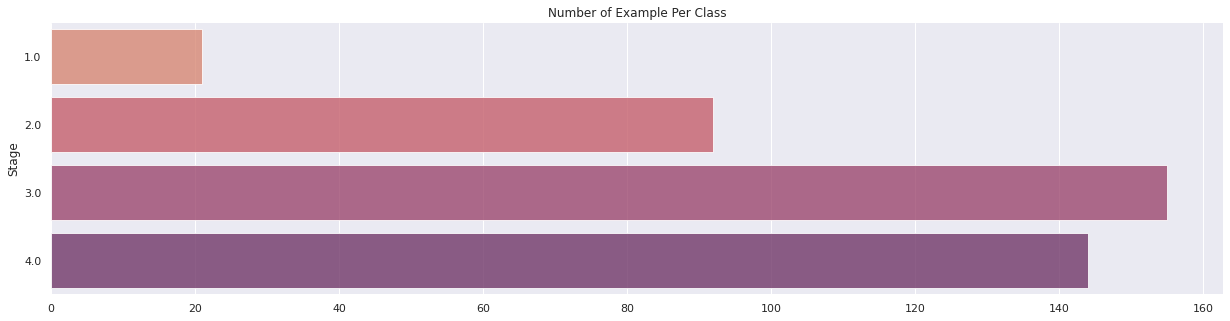

In [ ]:
plt.figure(figsize=(21,5))
sns.countplot(y=df['Stage'], palette="flare", alpha=0.8, )
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number of Example Per Class')

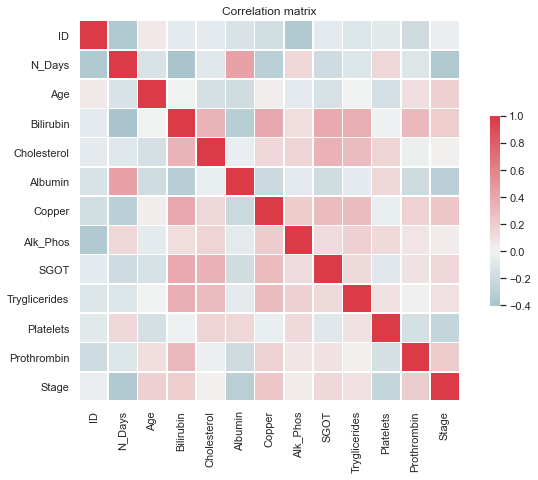

In [ ]:
# Selecting only numerical features
list_numeric = list(df.describe().columns)
corr = df.corr()

# Plot
sns.set_style("white")
f, ax = plt.subplots(figsize=(11,7))
plt.title("Correlation matrix")
sns.heatmap(corr, cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, vmax = 1, center = 0, linewidths = .5, cbar_kws = {"shrink": .5})

plt.show()

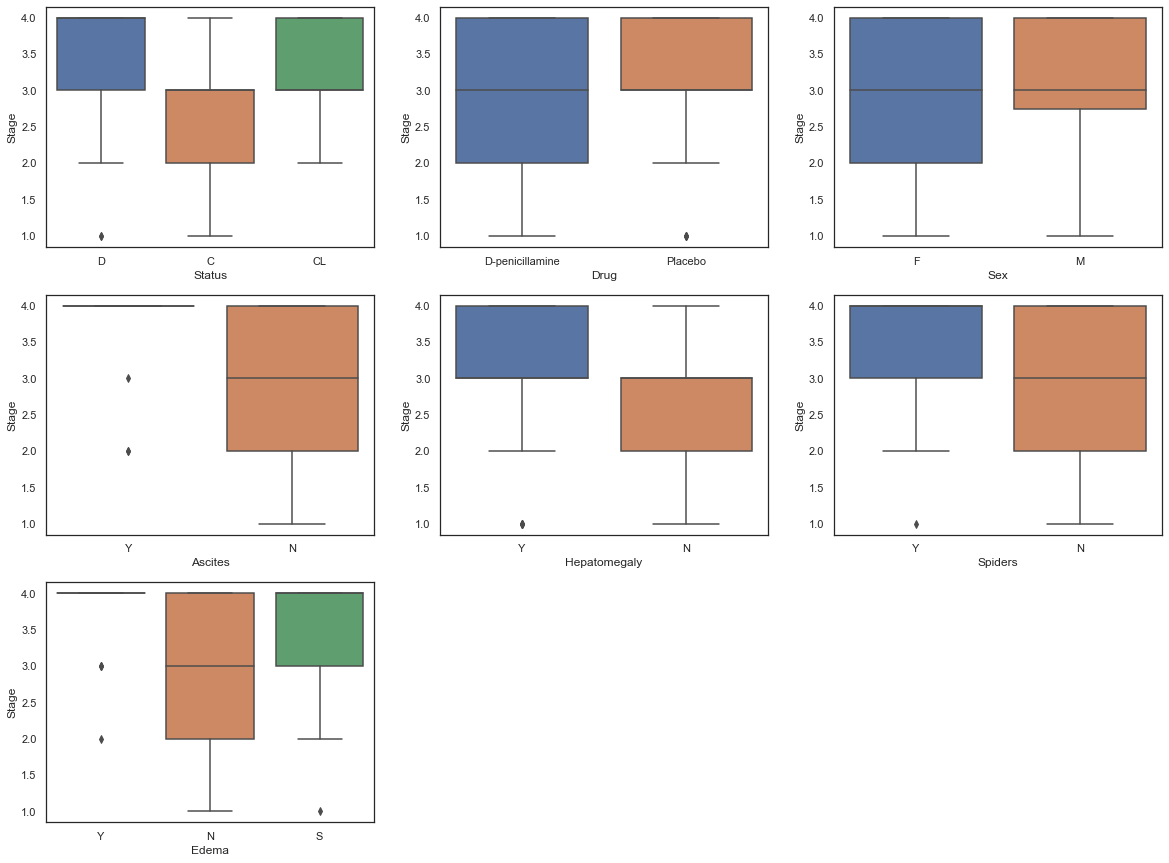

In [ ]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'Status', y = 'Stage', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'Drug', y = 'Stage', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'Sex', y = 'Stage', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'Ascites', y = 'Stage', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'Hepatomegaly', y = 'Stage', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'Spiders', y = 'Stage', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'Edema', y = 'Stage', data = df)
plt.show()

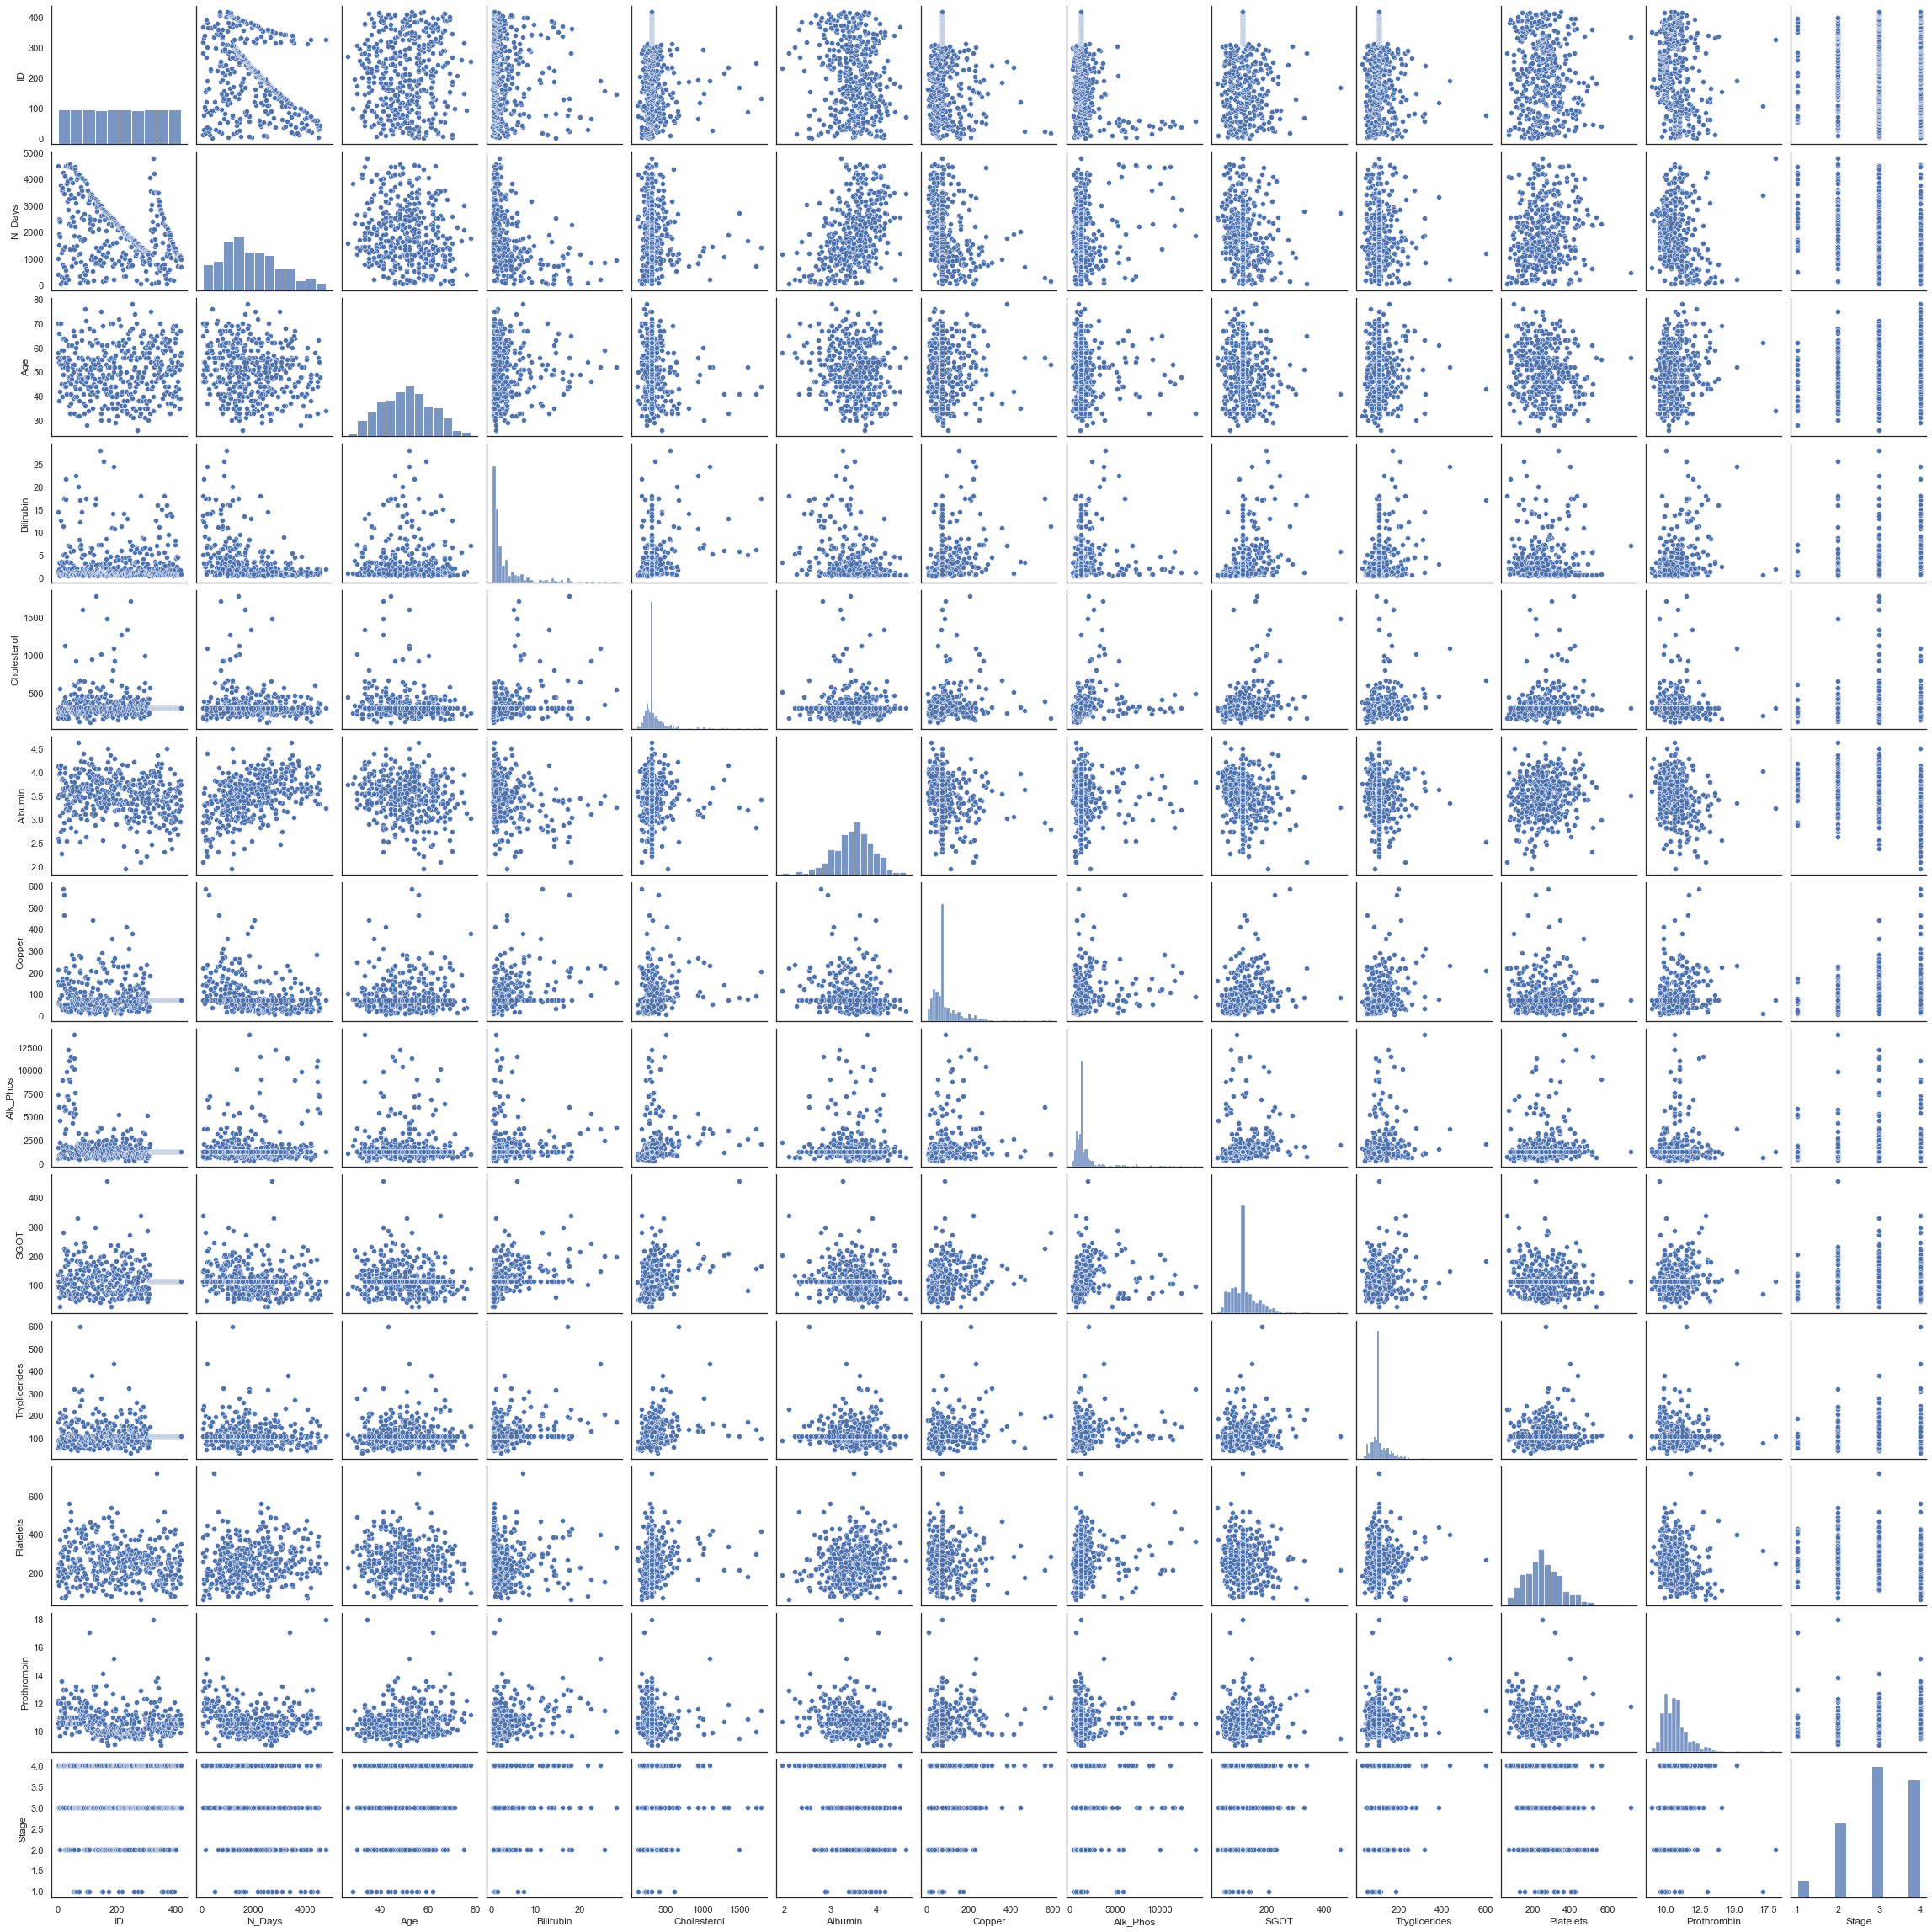

In [ ]:
num_col = df.select_dtypes(exclude=['object']).columns
ax = sns.pairplot(df[num_col])

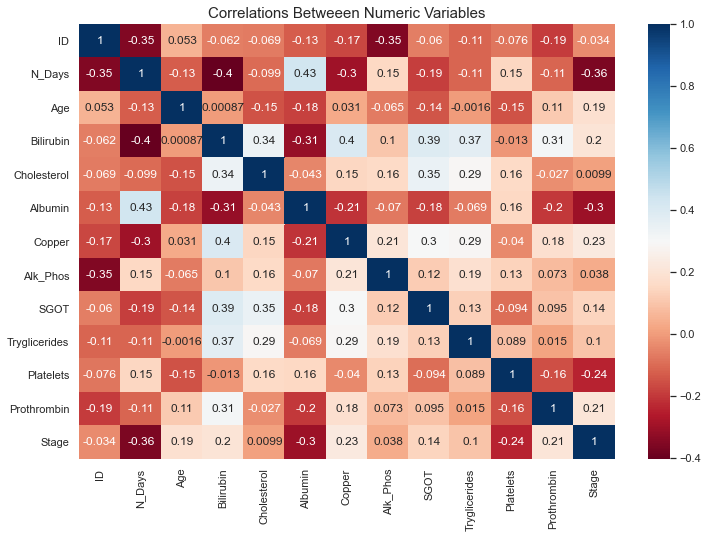

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Betweeen Numeric Variables", size=15)
plt.show()

In [ ]:
df['Stage'].value_counts()

3.0000    161
4.0000    144
2.0000    92 
1.0000    21 
Name: Stage, dtype: int64

In [ ]:
# Converting Target categories into intigers 1 for Cirrhosis, 0 otherwise
df['Stage'] = np.where(df['Stage'] == 4,1,0)

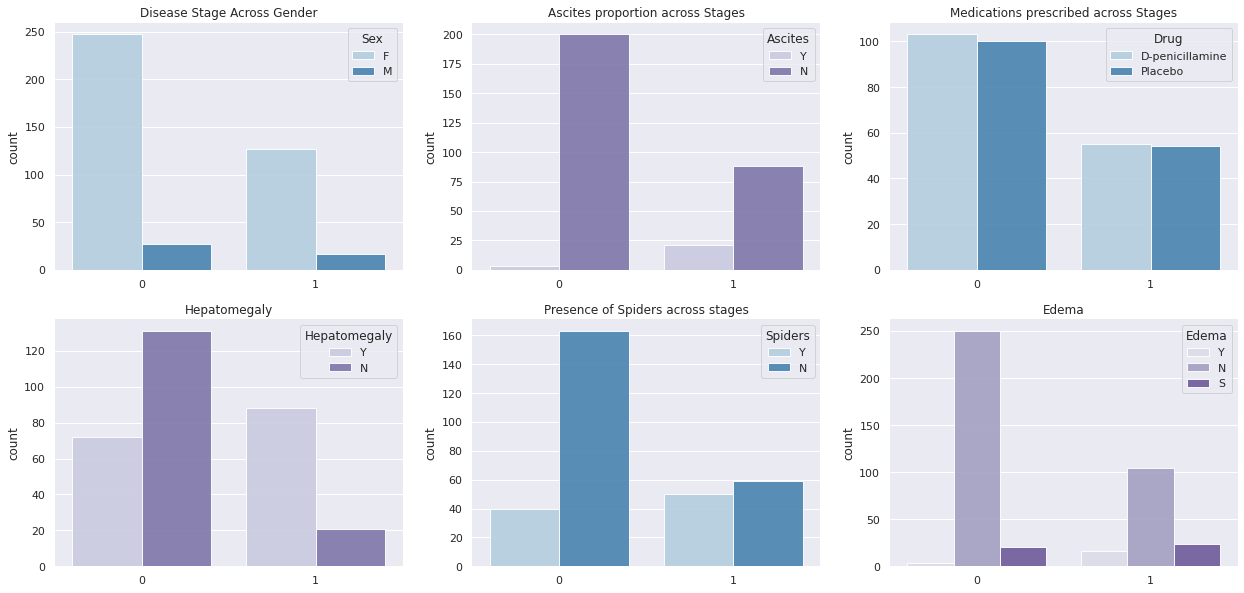

In [ ]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=df['Stage'], hue=df['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Disease Stage Across Gender')

plt.subplot(2,3,2)
sns.countplot(x=df['Stage'], hue=df['Ascites'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Ascites proportion across Stages')

plt.subplot(2,3,3)
sns.countplot(x=df['Stage'], hue=df['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Stages');

plt.subplot(2,3,4)
sns.countplot(x=df['Stage'], hue=df['Hepatomegaly'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly');

plt.subplot(2,3,5)
sns.countplot(x=df['Stage'], hue=df['Spiders'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders across stages');

plt.subplot(2,3,6)
sns.countplot(x=df['Stage'], hue=df['Edema'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Edema');

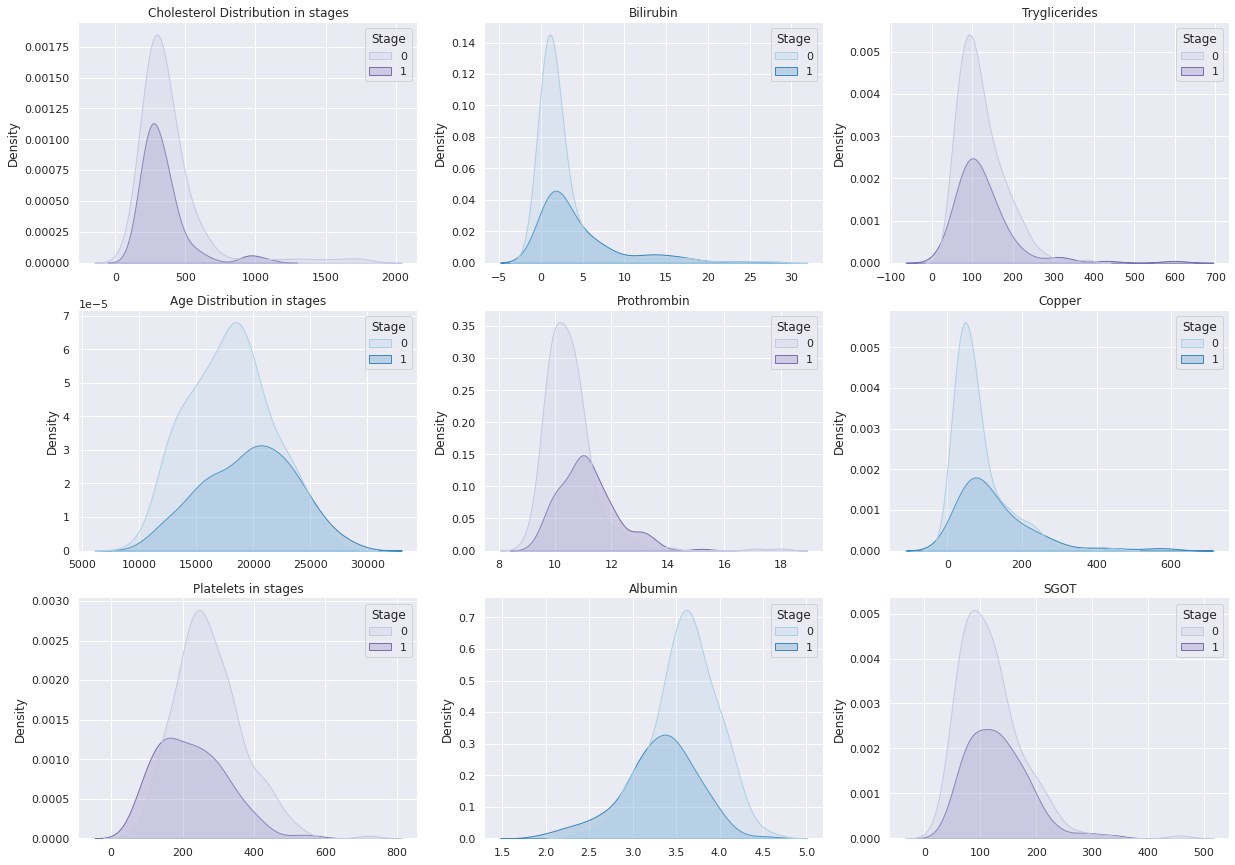

In [ ]:
plt.figure(figsize=(20.6,15))

plt.subplot(3,3,1)
sns.kdeplot(df['Cholesterol'], hue=df['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Cholesterol Distribution in stages');

plt.subplot(3,3,2)
sns.kdeplot(df['Bilirubin'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Bilirubin');

plt.subplot(3,3,3)
sns.kdeplot(df['Tryglicerides'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Tryglicerides');

plt.subplot(3,3,4)
sns.kdeplot(df['Age'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Age Distribution in stages');

plt.subplot(3,3,5)
sns.kdeplot(df['Prothrombin'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Prothrombin');

plt.subplot(3,3,6)
sns.kdeplot(df['Copper'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Copper');

plt.subplot(3,3,7)
sns.kdeplot(df['Platelets'], hue=df['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Platelets in stages');

plt.subplot(3,3,8)
sns.kdeplot(df['Albumin'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Albumin');

plt.subplot(3,3,9)
sns.kdeplot(df['SGOT'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('SGOT');

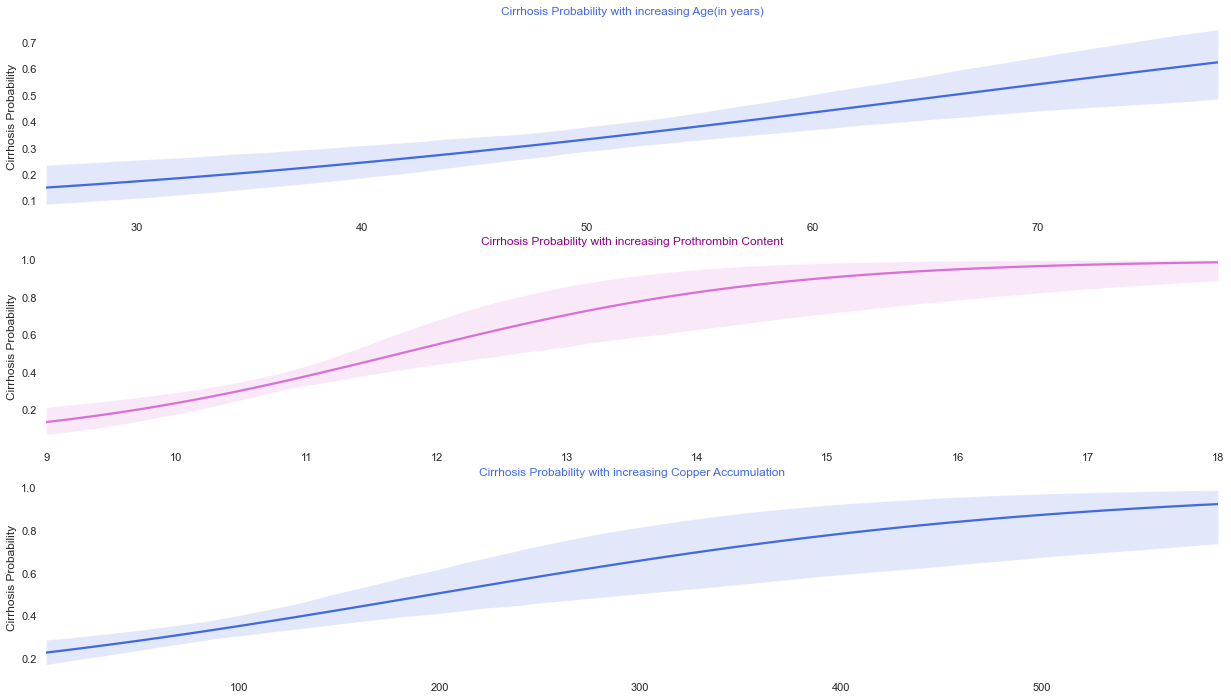

In [ ]:
plt.figure(figsize=(21,12))

plt.subplot(3,1,1)
sns.regplot(x=df['Age'], y=df['Stage'], scatter=False, logistic=True, color='royalblue')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Age(in years)'), color='royalblue') ;

plt.subplot(3,1,2)
sns.regplot(x=df['Prothrombin'], y=df['Stage'], scatter=False, logistic=True, color='orchid');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Prothrombin Content'), color='darkmagenta');

plt.subplot(3,1,3)
sns.regplot(x=df['Copper'], y=df['Stage'], scatter=False, logistic=True, color='royalblue')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Copper Accumulation'), color='royalblue') ;

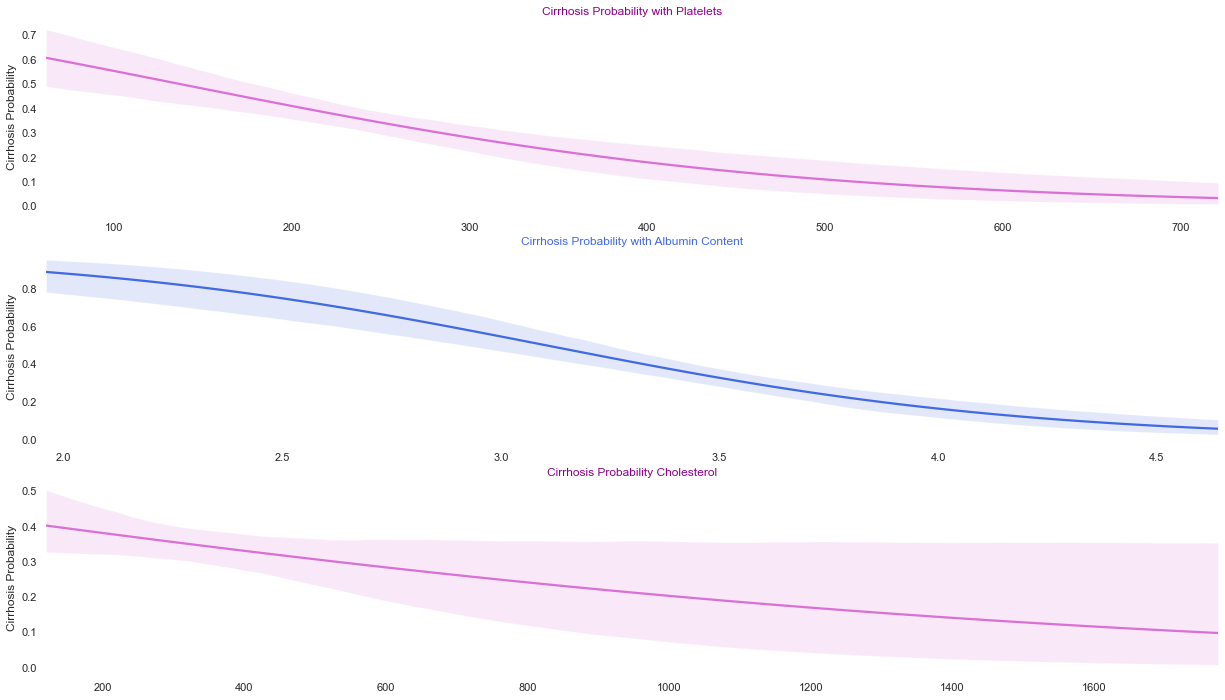

In [ ]:
plt.figure(figsize=(21,12))

plt.subplot(3,1,1)
sns.regplot(x=df['Platelets'], y=df['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with Platelets'), color='darkmagenta');

plt.subplot(3,1,2)
sns.regplot(x=df['Albumin'], y=df['Stage'], scatter=False, logistic=True, color='royalblue');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with Albumin Content'), color='royalblue');

plt.subplot(3,1,3)
sns.regplot(x=df['Cholesterol'], y=df['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability Cholesterol'), color='darkmagenta') ;

In [ ]:
# replacing catagorical data with intigers.
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})                                # Male : 0 , Female :1
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1   
df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1   
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df['Edema'] = df['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
df['Status'] = df['Status'].replace({'C':0, 'CL':1, 'D':-1})                 # 'C':0, 'CL':1, 'D':-1

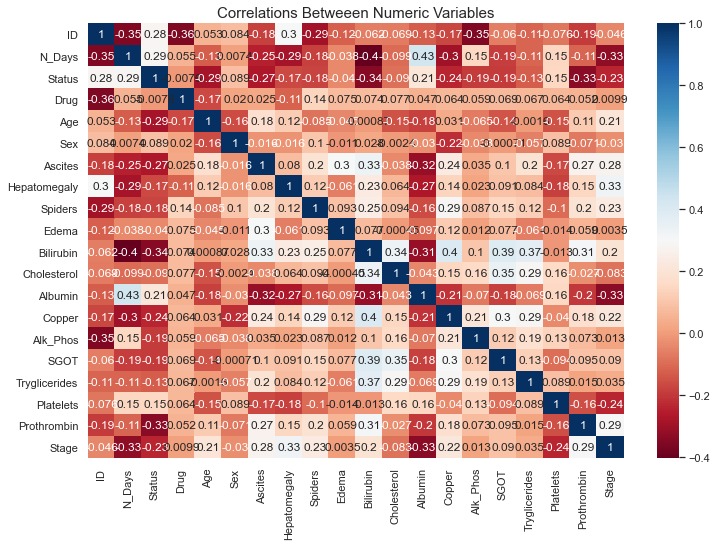

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Betweeen Numeric Variables", size=15)
plt.show()

In [ ]:
X = df.drop(['ID', 'Stage'], axis=1)
y = df.pop('Stage')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7261904761904762
[[51  6]
 [17 10]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.82        57
           1       0.62      0.37      0.47        27

    accuracy                           0.73        84
   macro avg       0.69      0.63      0.64        84
weighted avg       0.71      0.73      0.70        84



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
param_grid = {'penalty': ['l2', 'elasticnet', 'none'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C': [100, 10, 1.0, 0.1, 0.01]
             }

cv_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv= 5)
cv_lr.fit(X_train,y_train)
cv_lr.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
lr_tune = LogisticRegression(C = 1.0, penalty= 'l2', solver= 'newton-cg')
lr_tune.fit(X_train, y_train)
pred = lr_tune.predict(X_test)

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7738095238095238
[[52  5]
 [14 13]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        57
           1       0.72      0.48      0.58        27

    accuracy                           0.77        84
   macro avg       0.76      0.70      0.71        84
weighted avg       0.77      0.77      0.76        84



In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
pred1 = nb.predict(X_test)

print(accuracy_score(y_test, pred1))
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test, pred1))

0.7738095238095238
[[52  5]
 [14 13]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        57
           1       0.72      0.48      0.58        27

    accuracy                           0.77        84
   macro avg       0.76      0.70      0.71        84
weighted avg       0.77      0.77      0.76        84



In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)
             }

cv_nb = GridSearchCV(estimator=nb, param_grid=param_grid, cv= 5)
cv_nb.fit(X_train,y_train)
cv_nb.best_params_

{'var_smoothing': 8.111308307896856e-09}

In [ ]:
nb_tune = GaussianNB(var_smoothing = 8.111308307896856e-09)
nb_tune.fit(X_train, y_train)
pred1 = nb_tune.predict(X_test)

print(accuracy_score(y_test, pred1))
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test, pred1))

0.7857142857142857
[[53  4]
 [14 13]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        57
           1       0.76      0.48      0.59        27

    accuracy                           0.79        84
   macro avg       0.78      0.71      0.72        84
weighted avg       0.78      0.79      0.77        84



In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
pred2 = sgd.predict(X_test)

print(accuracy_score(y_test, pred2))
print(confusion_matrix(y_test, pred2))
print(classification_report(y_test, pred2))

0.6666666666666666
[[54  3]
 [25  2]]
              precision    recall  f1-score   support

           0       0.68      0.95      0.79        57
           1       0.40      0.07      0.12        27

    accuracy                           0.67        84
   macro avg       0.54      0.51      0.46        84
weighted avg       0.59      0.67      0.58        84



In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
param_grid = {'loss': ['str', 'hinge'],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'alpha': [0.0001, 0.001, 0.01, 1],
              'l1_ratio': [0.15, 0.1, 0.2, 0.5, 0.75, 1],
              'shuffle': [True, False],
              'random_state': [1, 3, 7]
             }

cv_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid, cv= 5)
cv_sgd.fit(X_train,y_train)
cv_sgd.best_params_

{'alpha': 0.001,
 'l1_ratio': 0.15,
 'loss': 'hinge',
 'penalty': 'l1',
 'random_state': 3,
 'shuffle': True}

In [ ]:
sgd_tune = SGDClassifier(alpha = 0.001,l1_ratio = 0.15,loss = 'hinge',penalty = 'l1',random_state= 3,shuffle= True)
sgd_tune.fit(X_train, y_train)
pred2 = sgd_tune.predict(X_test)

print(accuracy_score(y_test, pred2))
print(confusion_matrix(y_test, pred2))
print(classification_report(y_test, pred2))

0.7142857142857143
[[53  4]
 [20  7]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        57
           1       0.64      0.26      0.37        27

    accuracy                           0.71        84
   macro avg       0.68      0.59      0.59        84
weighted avg       0.70      0.71      0.67        84



In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred3 = knn.predict(X_test)

print(accuracy_score(y_test, pred3))
print(confusion_matrix(y_test, pred3))
print(classification_report(y_test, pred3))

0.6785714285714286
[[47 10]
 [17 10]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.78        57
           1       0.50      0.37      0.43        27

    accuracy                           0.68        84
   macro avg       0.62      0.60      0.60        84
weighted avg       0.66      0.68      0.66        84



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [1,2,3,4,5,6,7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [30,40,50,20,10],
              'p': [1,2]
             }

cv_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 5)
cv_knn.fit(X_train,y_train)
cv_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn_tune = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, n_neighbors = 6, p = 2, weights = 'uniform')
knn_tune.fit(X_train,y_train)
pred3 = knn_tune.predict(X_test)

print(accuracy_score(y_test, pred3))
print(confusion_matrix(y_test, pred3))
print(classification_report(y_test, pred3))

0.7142857142857143
[[51  6]
 [18  9]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        57
           1       0.60      0.33      0.43        27

    accuracy                           0.71        84
   macro avg       0.67      0.61      0.62        84
weighted avg       0.69      0.71      0.69        84



In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
pred4 = dtree.predict(X_test)

print(accuracy_score(y_test, pred4))
print(confusion_matrix(y_test, pred4))
print(classification_report(y_test, pred4))

0.6428571428571429
[[42 15]
 [15 12]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        57
           1       0.44      0.44      0.44        27

    accuracy                           0.64        84
   macro avg       0.59      0.59      0.59        84
weighted avg       0.64      0.64      0.64        84



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [8,16,32],
              'min_samples_split': [2,4,6],
              'min_samples_leaf': [1,3,5,7],
              'max_features': ['auto', 'sqrt', 'log2', None]
             }

cv_dtree = GridSearchCV(estimator=dtree, param_grid=param_grid, cv= 5)
cv_dtree.fit(X_train,y_train)
cv_dtree.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'splitter': 'best'}

In [ ]:
dtree_tune = DecisionTreeClassifier(criterion = 'entropy', max_depth=8, min_samples_leaf=7, min_samples_split=6, splitter='best', max_features= 'auto')
dtree_tune.fit(X_train, y_train)
pred4 = dtree_tune.predict(X_test)

print(accuracy_score(y_test, pred4))
print(confusion_matrix(y_test, pred4))
print(classification_report(y_test, pred4))

0.6547619047619048
[[45 12]
 [17 10]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        57
           1       0.45      0.37      0.41        27

    accuracy                           0.65        84
   macro avg       0.59      0.58      0.58        84
weighted avg       0.64      0.65      0.64        84



In [ ]:
rfm = RandomForestClassifier()
rfm.fit(X_train, y_train)
pred5 = rfm.predict(X_test)

print(accuracy_score(y_test, pred5))
print(confusion_matrix(y_test, pred5))
print(classification_report(y_test, pred5))

0.75
[[53  4]
 [17 10]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.83        57
           1       0.71      0.37      0.49        27

    accuracy                           0.75        84
   macro avg       0.74      0.65      0.66        84
weighted avg       0.74      0.75      0.72        84



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [8,16,32],
              'min_samples_split': [2,4,6,8,10],
              'min_samples_leaf': [1,3,5,7],
              'max_features': [2, 3, 'auto', 'sqrt', 'log2', None],
              'bootstrap': [True, False],
              'n_estimators': [100, 200, 300, 1000]
             }

cv_rfm = GridSearchCV(estimator=rfm, param_grid=param_grid, cv= 5)
cv_rfm.fit(X_train,y_train)
cv_rfm.best_params_

KeyboardInterrupt: ignored

In [ ]:
rfm_tune = RandomForestClassifier()
rfm_tune.fit(X_train, y_train)
pred5 = rfm_tune.predict(X_test)

print(accuracy_score(y_test, pred5))
print(confusion_matrix(y_test, pred5))
print(classification_report(y_test, pred5))

In [ ]:
svm = SVC(kernel="linear", C=0.025, probability=True, random_state=101)
svm.fit(X_train, y_train)
pred6 = svm.predict(X_test)

print(accuracy_score(y_test, pred6))
print(confusion_matrix(y_test, pred6))
print(classification_report(y_test, pred6))

0.75
[[52  5]
 [16 11]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        57
           1       0.69      0.41      0.51        27

    accuracy                           0.75        84
   macro avg       0.73      0.66      0.67        84
weighted avg       0.74      0.75      0.73        84



In [ ]:
pred_prob1 = lr.predict_proba(X_test)
pred_prob2 = nb.predict_proba(X_test)
pred_prob3 = sgd.predict_proba(X_test)
pred_prob4 = knn.predict_proba(X_test)
pred_prob5 = dtree.predict_proba(X_test)
pred_prob6 = rfm.predict_proba(X_test)
pred_prob7 = svm.predict_proba(X_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5, auc_score6, auc_score7)

0.7186484730344379 0.8180636777128005 0.6208576998050682 0.6972059779077322 0.6767381416504223 0.7020792722547109 0.7686809616634178


In [ ]:
xgbc = XGBClassifier(learning_rate=0.75, max_depth=3, random_state=1, gamma=0, eval_metric='error')
xgbc.fit(X_train, y_train)
pred6 = xgbc.predict(X_test)

print(accuracy_score(y_test, pred6))
print(confusion_matrix(y_test, pred6))
print(classification_report(y_test, pred6))

0.6785714285714286
[[48  9]
 [18  9]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        57
           1       0.50      0.33      0.40        27

    accuracy                           0.68        84
   macro avg       0.61      0.59      0.59        84
weighted avg       0.65      0.68      0.66        84



In [ ]:
pred_prob8 = xgbc.predict_proba(X_test)
fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob8[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score8 = roc_auc_score(y_test, pred_prob8[:,1])

print(auc_score8)

0.7134502923976608


In [ ]:
log_model = LogisticRegression()
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  log_model.fit(X_train, y_train)
  score = log_model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('Logestic Regression Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.7857142857142857
For Fold 2 the accuracy is 0.7857142857142857
For Fold 3 the accuracy is 0.6428571428571429
For Fold 4 the accuracy is 0.5952380952380952
For Fold 5 the accuracy is 0.6666666666666666
For Fold 6 the accuracy is 0.7380952380952381
For Fold 7 the accuracy is 0.7857142857142857
For Fold 8 the accuracy is 0.7619047619047619
For Fold 9 the accuracy is 0.7804878048780488
For Fold 10 the accuracy is 0.6829268292682927

Logestic Regression Mean Accuracy =  0.7225319396051102


In [ ]:
log_model_predict = log_model.predict(test)
log_model_predict_proba = log_model.predict_proba(test)

print(classification_report(y.iloc[test_index], log_model_predict))

fpr, tpr, threshold = roc_curve(y.iloc[test_index], log_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y.iloc[test_index], log_model_predict_proba[:,1]))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        27
           1       0.56      0.36      0.43        14

    accuracy                           0.68        41
   macro avg       0.64      0.60      0.61        41
weighted avg       0.66      0.68      0.66        41

AUC :  0.761904761904762


In [ ]:
nb_model = GaussianNB()
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  nb_model.fit(X_train, y_train)
  score = nb_model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('Naive Bayes Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.7619047619047619
For Fold 2 the accuracy is 0.7380952380952381
For Fold 3 the accuracy is 0.6904761904761905
For Fold 4 the accuracy is 0.6904761904761905
For Fold 5 the accuracy is 0.6904761904761905
For Fold 6 the accuracy is 0.7380952380952381
For Fold 7 the accuracy is 0.8333333333333334
For Fold 8 the accuracy is 0.8095238095238095
For Fold 9 the accuracy is 0.6829268292682927
For Fold 10 the accuracy is 0.8048780487804879

Naive Bayes Mean Accuracy =  0.7440185830429733


In [ ]:
nb_model_predict = nb_model.predict(test)
nb_model_predict_proba = nb_model.predict_proba(test)

print(classification_report(y.iloc[test_index], nb_model_predict))

fpr, tpr, threshold = roc_curve(y.iloc[test_index], nb_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y.iloc[test_index], nb_model_predict_proba[:,1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.75      0.64      0.69        14

    accuracy                           0.80        41
   macro avg       0.79      0.77      0.77        41
weighted avg       0.80      0.80      0.80        41

AUC :  0.7275132275132276


In [ ]:
sgd_model = SGDClassifier(loss='modified_huber')
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  sgd_model.fit(X_train, y_train)
  score = sgd_model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('Stochastic Gradient Descent Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.7380952380952381
For Fold 2 the accuracy is 0.7619047619047619
For Fold 3 the accuracy is 0.6666666666666666
For Fold 4 the accuracy is 0.6190476190476191
For Fold 5 the accuracy is 0.5476190476190477
For Fold 6 the accuracy is 0.6904761904761905
For Fold 7 the accuracy is 0.7619047619047619
For Fold 8 the accuracy is 0.7619047619047619
For Fold 9 the accuracy is 0.7073170731707317
For Fold 10 the accuracy is 0.7804878048780488

Stochastic Gradient Descent Mean Accuracy =  0.7035423925667827


In [ ]:
sgd_model_predict = sgd_model.predict(test)
sgd_model_predict_proba = sgd_model.predict_proba(test)

print(classification_report(y.iloc[test_index], sgd_model_predict))

fpr, tpr, threshold = roc_curve(y.iloc[test_index], sgd_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y.iloc[test_index], sgd_model_predict_proba[:,1]))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.63      0.86      0.73        14

    accuracy                           0.78        41
   macro avg       0.77      0.80      0.77        41
weighted avg       0.81      0.78      0.79        41

AUC :  0.7989417989417988


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=15)
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  knn_model.fit(X_train, y_train)
  score = knn_model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('K-Nearest Neighbors Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.7142857142857143
For Fold 2 the accuracy is 0.6666666666666666
For Fold 3 the accuracy is 0.7142857142857143
For Fold 4 the accuracy is 0.7142857142857143
For Fold 5 the accuracy is 0.5714285714285714
For Fold 6 the accuracy is 0.7142857142857143
For Fold 7 the accuracy is 0.8095238095238095
For Fold 8 the accuracy is 0.6904761904761905
For Fold 9 the accuracy is 0.6829268292682927
For Fold 10 the accuracy is 0.7317073170731707

K-Nearest Neighbors Mean Accuracy =  0.7009872241579558


In [ ]:
knn_model_predict = knn_model.predict(test)
knn_model_predict_proba = knn_model.predict_proba(test)

print(classification_report(y.iloc[test_index], knn_model_predict))

fpr, tpr, threshold = roc_curve(y.iloc[test_index], knn_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y.iloc[test_index], knn_model_predict_proba[:,1]))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82        27
           1       0.71      0.36      0.48        14

    accuracy                           0.73        41
   macro avg       0.72      0.64      0.65        41
weighted avg       0.73      0.73      0.70        41

AUC :  0.7711640211640212


In [ ]:
dtree_model = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  dtree_model.fit(X_train, y_train)
  score = dtree_model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('Decision Tree Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.6904761904761905
For Fold 2 the accuracy is 0.47619047619047616
For Fold 3 the accuracy is 0.5714285714285714
For Fold 4 the accuracy is 0.6428571428571429
For Fold 5 the accuracy is 0.6904761904761905
For Fold 6 the accuracy is 0.6904761904761905
For Fold 7 the accuracy is 0.5952380952380952
For Fold 8 the accuracy is 0.7619047619047619
For Fold 9 the accuracy is 0.6341463414634146
For Fold 10 the accuracy is 0.7317073170731707

Decision Tree Mean Accuracy =  0.6484901277584203


In [ ]:
dtree_model_predict = dtree_model.predict(test)
dtree_model_predict_proba = dtree_model.predict_proba(test)

print(classification_report(y.iloc[test_index], dtree_model_predict))

fpr, tpr, threshold = roc_curve(y.iloc[test_index], dtree_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y.iloc[test_index], dtree_model_predict_proba[:,1]))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.64      0.50      0.56        14

    accuracy                           0.73        41
   macro avg       0.70      0.68      0.68        41
weighted avg       0.72      0.73      0.72        41

AUC :  0.6759259259259258


In [ ]:
rfm_model = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features=None, min_samples_leaf=30)
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  rfm_model.fit(X_train, y_train)
  score = rfm_model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('Random Forest Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.6904761904761905
For Fold 2 the accuracy is 0.7619047619047619
For Fold 3 the accuracy is 0.6190476190476191
For Fold 4 the accuracy is 0.7142857142857143
For Fold 5 the accuracy is 0.5714285714285714
For Fold 6 the accuracy is 0.7380952380952381
For Fold 7 the accuracy is 0.8571428571428571
For Fold 8 the accuracy is 0.7857142857142857
For Fold 9 the accuracy is 0.7317073170731707
For Fold 10 the accuracy is 0.7317073170731707

Random Forest Mean Accuracy =  0.7201509872241579


In [ ]:
rfm_model_predict = rfm_model.predict(test)
rfm_model_predict_proba = rfm_model.predict_proba(test)

print(classification_report(y.iloc[test_index], rfm_model_predict))

fpr, tpr, threshold = roc_curve(y.iloc[test_index], rfm_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y.iloc[test_index], rfm_model_predict_proba[:,1]))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82        27
           1       0.71      0.36      0.48        14

    accuracy                           0.73        41
   macro avg       0.72      0.64      0.65        41
weighted avg       0.73      0.73      0.70        41

AUC :  0.8465608465608465


In [ ]:
svm_model = SVC(kernel="linear", C=0.025, probability=True, random_state=101)
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  svm_model.fit(X_train, y_train)
  score = svm_model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('Support Vector Machine Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.7380952380952381
For Fold 2 the accuracy is 0.7380952380952381
For Fold 3 the accuracy is 0.6428571428571429
For Fold 4 the accuracy is 0.6190476190476191
For Fold 5 the accuracy is 0.6666666666666666
For Fold 6 the accuracy is 0.7857142857142857
For Fold 7 the accuracy is 0.8333333333333334
For Fold 8 the accuracy is 0.7857142857142857
For Fold 9 the accuracy is 0.7560975609756098
For Fold 10 the accuracy is 0.7317073170731707

Support Vector Machine Mean Accuracy =  0.729732868757259


In [ ]:
svm_model_predict = svm_model.predict(test)
svm_model_predict_proba = svm_model.predict_proba(test)

print(classification_report(y.iloc[test_index], svm_model_predict))

fpr, tpr, threshold = roc_curve(y.iloc[test_index], svm_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y.iloc[test_index], svm_model_predict_proba[:,1]))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        27
           1       0.67      0.43      0.52        14

    accuracy                           0.73        41
   macro avg       0.71      0.66      0.67        41
weighted avg       0.72      0.73      0.71        41

AUC :  0.7248677248677249


In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
xgb_model = XGBClassifier(learning_rate=0.75, max_depth=3, random_state=1, gamma=0, eval_metric='error')

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  xgb_model.fit(X_train, y_train)
  score = xgb_model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('XGboost model Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.7142857142857143
For Fold 2 the accuracy is 0.7857142857142857
For Fold 3 the accuracy is 0.7142857142857143
For Fold 4 the accuracy is 0.7142857142857143
For Fold 5 the accuracy is 0.7380952380952381
For Fold 6 the accuracy is 0.6904761904761905
For Fold 7 the accuracy is 0.8095238095238095
For Fold 8 the accuracy is 0.8571428571428571
For Fold 9 the accuracy is 0.6585365853658537
For Fold 10 the accuracy is 0.7804878048780488

XGboost model Mean Accuracy =  0.7462833914053426


In [ ]:
xgb_model_predict = xgb_model.predict(test)
xgb_model_predict_proba = xgb_model.predict_proba(test)

print(classification_report(y.iloc[test_index], xgb_model_predict))

fpr, tpr, threshold = roc_curve(y.iloc[test_index], xgb_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y.iloc[test_index], xgb_model_predict_proba[:,1]))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.69      0.64      0.67        14

    accuracy                           0.78        41
   macro avg       0.76      0.75      0.75        41
weighted avg       0.78      0.78      0.78        41

AUC :  0.7936507936507937


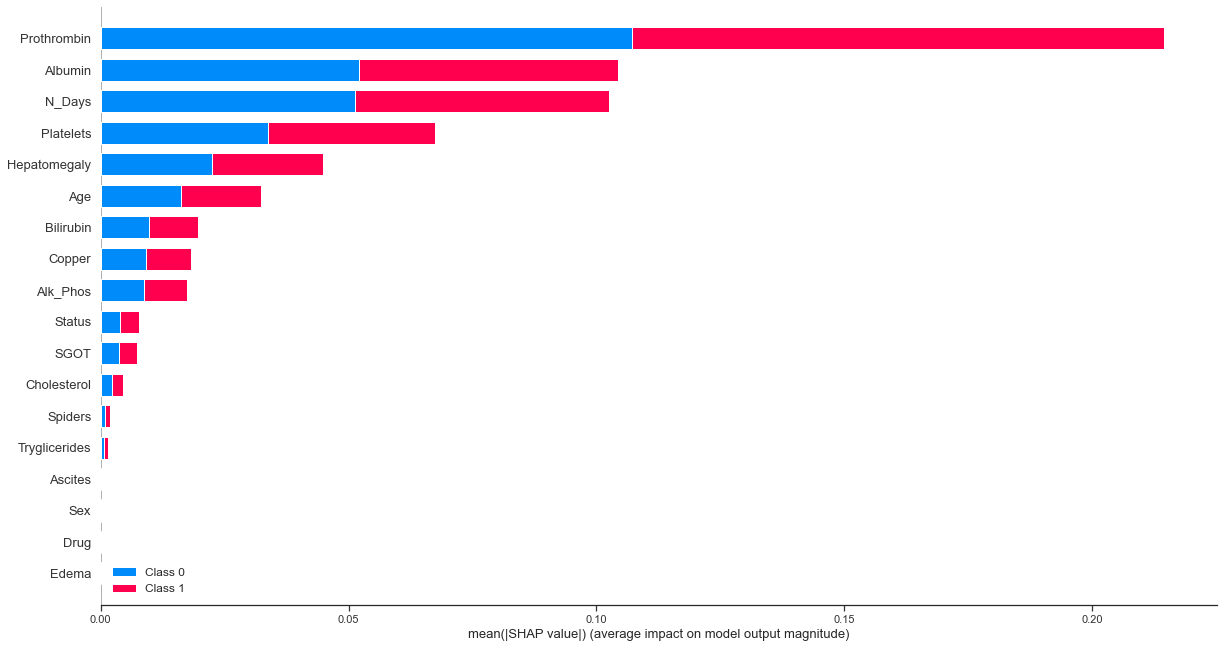

In [ ]:
import shap

explainer = shap.TreeExplainer(rfm_model)

shap_values = explainer.shap_values(test)
shap.summary_plot(shap_values, train, plot_size=(20,11), alpha=0.2, plot_type='bar')